Column Names:
Index(['Home', 'Price', 'SqFt', 'Bedrooms', 'Bathrooms', 'Offers', 'Brick',
       'Neighborhood'],
      dtype='object')
Mean Squared Error: 320149938.23
R-squared: 0.46

Model Coefficients:
Intercept: -16372.916362967415
Square Footage Coefficient: 41.44755181302521
Bedrooms Coefficient: 10278.009102073349
Bathrooms Coefficient: 13090.391181440675


C:\Users\Gopib\AppData\Local\Temp\ipykernel_10064\1916356734.py:47: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')


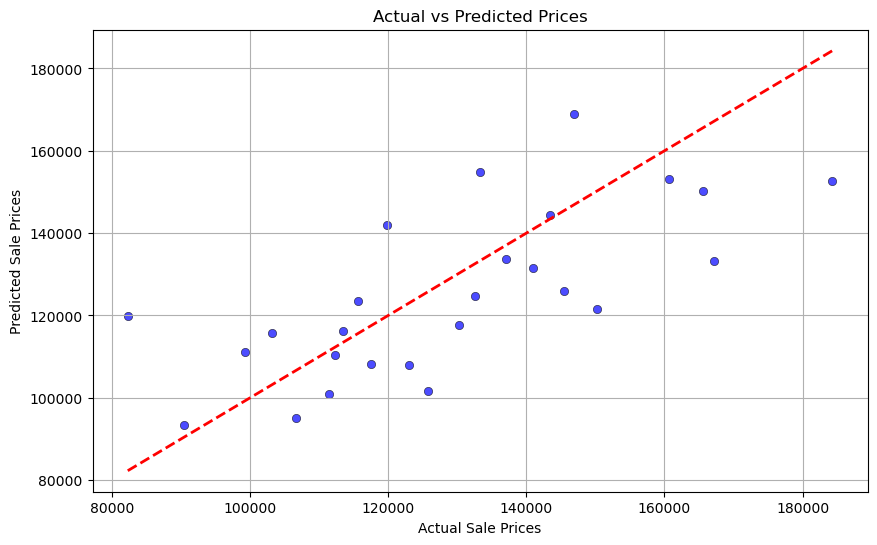

C:\Users\Gopib\AppData\Local\Temp\ipykernel_10064\1916356734.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Feature', y='Coefficient', data=coefficients, palette='viridis')


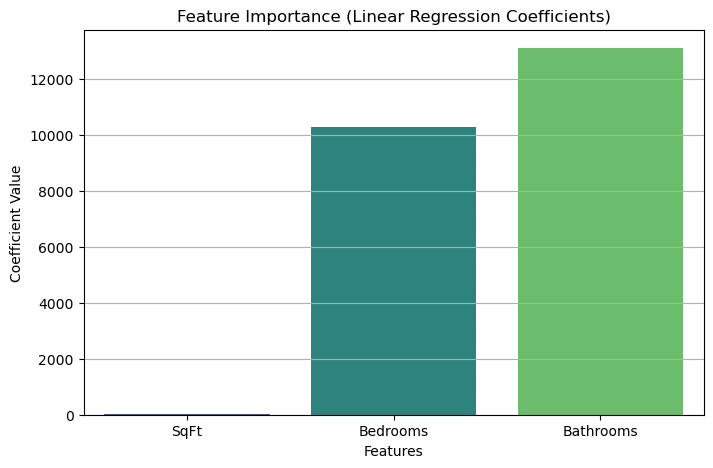


Predicted Price for the house [[2500, 4, 3]]: $167629.17


C:\Users\Gopib\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

file_path = 'houseprice.csv.csv'
data = pd.read_csv(file_path)


print("Column Names:")
print(data.columns)

features = data[['SqFt', 'Bedrooms', 'Bathrooms']]
target = data['Price']  


features = features.fillna(features.mean())
target = target.fillna(target.mean())

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)


y_pred = model.predict(X_test)


mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse:.2f}")
print(f"R-squared: {r2:.2f}")

print("\nModel Coefficients:")
print(f"Intercept: {model.intercept_}")
print(f"Square Footage Coefficient: {model.coef_[0]}")
print(f"Bedrooms Coefficient: {model.coef_[1]}")
print(f"Bathrooms Coefficient: {model.coef_[2]}")


plt.figure(figsize=(10, 6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7, color='blue', edgecolor='k')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2, color='red')
plt.title('Actual vs Predicted Prices')
plt.xlabel('Actual Sale Prices')
plt.ylabel('Predicted Sale Prices')
plt.grid(True)
plt.show()


coefficients = pd.DataFrame({
    'Feature': ['SqFt', 'Bedrooms', 'Bathrooms'],
    'Coefficient': model.coef_
})
plt.figure(figsize=(8, 5))
sns.barplot(x='Feature', y='Coefficient', data=coefficients, palette='viridis')
plt.title('Feature Importance (Linear Regression Coefficients)')
plt.xlabel('Features')
plt.ylabel('Coefficient Value')
plt.grid(axis='y')
plt.show()


example_house = [[2500, 4, 3]]  # Example: 2500 sq ft, 4 bedrooms, 3 bathrooms
predicted_price = model.predict(example_house)
print(f"\nPredicted Price for the house {example_house}: ${predicted_price[0]:.2f}")
